# Quantum Oracle - Preparation for Grover’s Algorithm
Oleksandr Yasinskyi 150570

In [1]:
from qiskit import QuantumRegister, QuantumCircuit
from qiskit.quantum_info import Operator
import math
import numpy as np

## XOR and Phase Oracles

In [2]:
n = 8
xorMatrix = [[0 for i in range(n)] for e in range(n)]
phaseMatrix = [[0 for i in range(n)] for e in range(n)]

In [3]:
xor = 0  # 00
phase = 3  # 011

for j in range(n):
    for i in range(n):
        if i==j:
            if i==phase:
                phaseMatrix[j][i]=-1
            else:
                phaseMatrix[j][i]=1

def tobinary(v):
    return '{0:03b}'.format(v)

for j in range(n):
    for i in range(n):
        v = i
        if i % 4 == 0:
            v = list([int(z) for z in tobinary(i)])
            if v[0] == 1:
                v[0] = 0
            else:
                v[0] = 1
            v = v[0] * 2 ** 2 + v[1] * 2 + v[2]
        if v == j:
            xorMatrix[j][i] = 1

In [4]:
phaseMatrix

[[1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, -1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1]]

In [5]:
xorMatrix

[[0, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1]]

## Explicit matrix form of operator $\lvert 0 \rangle_n {}_n\langle 0 \rvert$
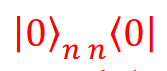

In [6]:
z_m = [[0 for i in range(n)] for e in range(n)]
z_m[0][0] = 1

## Explicit matrix form of operator $2\lvert 0 \rangle_n {}_n\langle 0 \rvert - \hat{\mathbb{I}}$
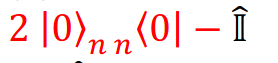

In [7]:
z_em = 2 * np.array(z_m) - np.identity(n)

## Equation proof
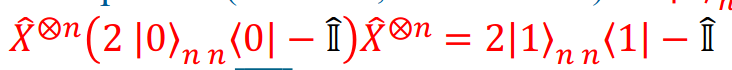
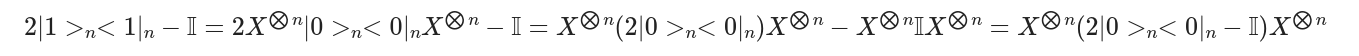

$2|1>_n {}_n<1|_n − \hat{\mathbb{I}} = 2 X^{\bigotimes n}|0>_n {}_n<0|_n X^{\bigotimes n} − \hat{\mathbb{I}} = X^{\bigotimes n}(2|0>_n {}_n<0|_n)X^{\bigotimes n} − X^{\bigotimes n}\hat{\mathbb{I}}X^{\bigotimes n} = X^{\bigotimes n}( 2|0>_n {}_n<0|_n − \hat{\mathbb{I}} )X^{\bigotimes n}$

## Explicit matrix form of operator $\hat{W}$ - Grover’s diffusion operator

$\hat{W} = 2 \frac{1}{N} \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} |x \rangle \langle y| - \hat{\mathbb{I}}$

In [8]:
wmatrix = [[1 for i in range(n)] for e in range(n)]
for j in range(n):
    for i in range(n):
        if i == j:
            wmatrix[j][i] -= 2 ** (math.log2(n)) / 2
wmatrix = list((2 / 2 ** (math.log2(n))) * np.array(wmatrix))

## Quantum gates representing $U_f$ and $\hat{W}$

In [9]:
utest = Operator(xorMatrix)
assert Operator.is_unitary(utest)

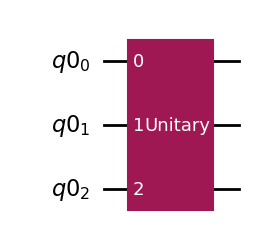

In [10]:
n0 = 3 # Number of qubits and bits
q0 = QuantumRegister(n0) # Quantum Register
Utest = QuantumCircuit(q0, name='Uf') # Quantum algorithm - quantum circuit
Utest.append(utest, [0, 1, 2])

Utest.draw(output="mpl", style="iqp") # Quantum circuit sketch

In [11]:
wtest = Operator(wmatrix)
assert Operator.is_unitary(wtest)

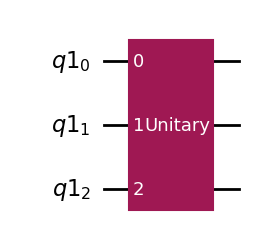

In [12]:
n0 = 3 # Number of qubits and bits
q0 = QuantumRegister(n0) # Quantum Register
Wtest = QuantumCircuit(q0, name='W')
Wtest.append(wtest, [0, 1, 2])

Wtest.draw(output="mpl", style="iqp") # Quantum circuit sketch

In [13]:
Uf = Utest.to_gate()
W = Wtest.to_gate()

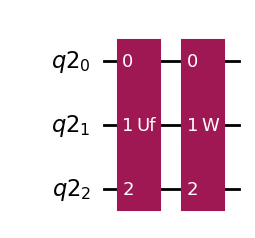

In [14]:
n = 3 # Number of qubits and bits
q = QuantumRegister(n) # Quantum Register
Circuit = QuantumCircuit(q) # Quantum algorithm - quantum circuit
Circuit.append(Uf, [q[0], q[1], q[2]])
Circuit.append(W, [q[0], q[1], q[2]])

Circuit.draw(output="mpl", style="iqp") # Quantum circuit sketch